In [ ]:
# %load_ext autoreload
# %autoreload 1
# %aimport metaheuristics.algorithme_genetique

In [1]:
cd ..

d:\Git\dir\ICO\codes


In [2]:
from metaheuristics.algorithme_genetique import*
from metaheuristics.base_problem import *
from loading_models import *
from vrptw import VRPTW


In [8]:
context = load_solomon('simple.csv', nb_cust=10, vehicle_speed=100)
# context = create_vrptw(CUSTOMER_DIR, DEPOTS_DIR, VEHICLES_DIR, DEPOTS_DISTANCES_DIR, CUSTOMER_DISTANCES_DIR, 2958047, MODE_VEHICLE="mean", vehicle_code=None)
vrptw = VRPTW(context)

In [11]:
cri=True
neighborhood_params={   'verbose':1,
                        'init_sol':'random',
                        'choose_mode':'random',
                        'use_methods' : ['intra_route_swap','inter_route_swap',
                            'intra_route_shift','inter_route_shift',
                            'two_intra_route_swap', 'two_intra_route_shift',
                            'delete_smallest_route'],
                        'force_new_sol': False,         
                        'full_search':False
                    }
instance =GeneticAlgorithm(num_evolu_per_search=1,neighborhood_params=neighborhood_params,reproductive_isolation=True,best_seed=True)
instance.fit_search(vrptw)

Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
A legitimate solution was successfully generated:
[[0, 4, 0],
 [0, 6, 0],
 [0, 2, 0],
 [0, 3, 0],
 [0, 10, 0],
 [0, 7, 5, 0],
 [0, 8, 1, 0],
 [0, 9, 0]]
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
So

[[0, 8, 3, 4, 9, 0], [0, 10, 0], [0, 2, 1, 0], [0, 7, 5, 6, 0]]

Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not

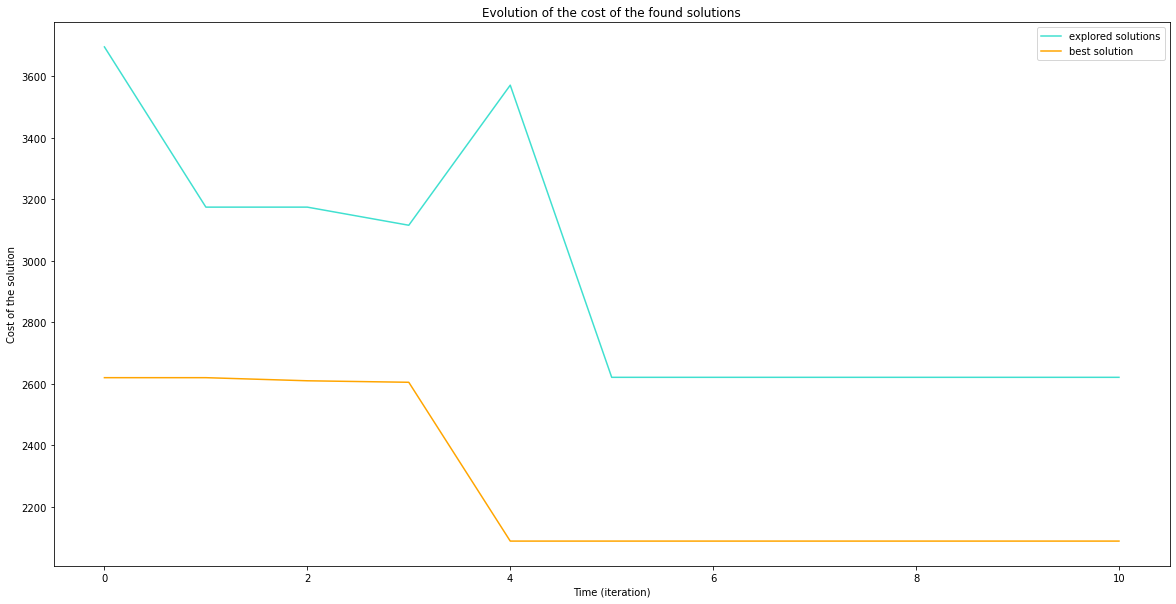

In [12]:
for _ in range(10):
    instance.search()
    cri=cri and instance.best_solution.checker()
print(cri)
instance.plot_evolution_cost()

In [6]:
n=instance.NEIGHBORHOOD()
n.set_params({'choose_mode':'delete_random_route'})

In [7]:
for mode in ['intra_route_swap','inter_route_swap',
            'intra_route_shift','inter_route_shift',
            'two_intra_route_swap', 'two_intra_route_shift',
            'delete_smallest_route','delete_random_route']:
    print(mode)
    n=instance.NEIGHBORHOOD()
    n.set_params({'choose_mode':mode})

    for _ in range(500):
        s1=n.initial_solution()
        s2=n(s1)
        r1=s1.checker()
        r2=s2.checker()
        if not r1 and r2:
            print(r1,r2) 

intra_route_swap
inter_route_swap
intra_route_shift
inter_route_shift
two_intra_route_swap
two_intra_route_shift
delete_smallest_route
delete_random_route


Concept of Nation

In [ ]:
context = load_solomon('simple.csv', nb_cust=10, vehicle_speed=100)
# context = create_vrptw(CUSTOMER_DIR, DEPOTS_DIR, VEHICLES_DIR, DEPOTS_DISTANCES_DIR, CUSTOMER_DISTANCES_DIR, 2958047, MODE_VEHICLE="mean", vehicle_code=None)

vrptw = VRPTW(context)
neighborhood_params={   'verbose':1,
                        'init_sol':'random',
                        'choose_mode':'random',
                        'force_new_sol': False,         
                        'full_search':True
                    }
instance =GeneticAlgorithm(num_evolu_per_search=1,neighborhood_params=neighborhood_params,reproductive_isolation=True,best_seed=True)
instance.fit_search(vrptw)

for _ in range(10):
    instance.search()
    print(instance.best_solution.checker())
instance.plot_evolution_cost()

In [ ]:
instance.problem.context.distances.shape

In [ ]:
instance.best_solution.checker()

In [ ]:
instance.best_solution

reproductive_isolation=False,best_seed=False

In [ ]:
instance.evolution_best_solution

reproductive_isolation=False,best_seed=True

In [ ]:
instance.evolution_best_solution

reproductive_isolation=True,best_seed=False

In [ ]:
instance.evolution_best_solution 

reproductive_isolation=True,best_seed=True

In [ ]:
instance.evolution_best_solution 

Exemple with load_solomon

In [ ]:
for _ in range(1):
    context = load_solomon('simple.csv', nb_cust=10, vehicle_speed=100)

# for route_id in customers['ROUTE_ID'].unique():
#     context = create_vrptw(CUSTOMER_DIR, DEPOTS_DIR, VEHICLES_DIR, DEPOTS_DISTANCES_DIR, CUSTOMER_DISTANCES_DIR, 2958047, MODE_VEHICLE="mean", vehicle_code=None)
   
    vrptw = VRPTW(context)
    neighborhood_params={   'verbose':0,
                            'init_sol':'random',
                            'choose_mode':'random',
                            'force_new_sol': True         
                        }
    instance =GeneticAlgorithm(num_evolu_per_search=10,neighborhood_params=neighborhood_params)
    instance.fit_search(vrptw)

    for _ in range(10):
        instance.search()
    instance.plot_evolution_cost()

DATA GENERATOR

In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
def generator_demand(low=8,high=42):
    tmp=int(np.random.normal(20,10))
    while(tmp<low or tmp>high):
        tmp=int(np.random.normal(20,10))
    return tmp

def generator_time_window(right=1300,avr_during=400,sigma_start=150,sigma_during=13):
    variance_start=sigma_start*sigma_start
    variance_during=sigma_during*sigma_during
    start=int(np.random.normal(450,variance_start))
    while(start>1050 or start<0):
        start=int(np.random.normal(450,variance_start))  
    
    during=int(np.random.normal(avr_during,variance_during))
    while(during<120):
        during=int(np.random.normal(avr_during,variance_during))  
    end=min(start+during,right)
    return start,end

def generator_datum():
    time_window = generator_time_window(1440, 650)
    start_time, end_time = time_window
    return random.randint(0, 100),random.randint(0, 100),generator_demand(),start_time,end_time,int(np.random.normal(80,3))

def generator_data(id_start,id_end):
    for i in range(id_start,id_end+1):
        print(f'{i},'+(str(generator_datum())).replace(' ','').replace('(','').replace(')','')+',')

In [ ]:
def generate_dataframe(n_customers=10):
    columns = ['CUSTNO', 'XCOORD', 'YCOORD', 'DEMAND', 'READYTIME', 'DUETIME', 'SERVICETIME']
    df = pd.DataFrame(data=([i]+list(generator_datum()) for i in range(1, n_customers+1)), columns=columns)
    df['CAPACITY'] = 200
    return df

def generate_csv(filename, n_customers):
    df = generate_dataframe(n_customers)
    df.to_csv(filename, index=False)    

In [ ]:
cd data_solomon

In [ ]:
generate_csv('A50.csv', 50)